In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
# from plotly.affine import plot
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as pyo
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("D:\project jupyter notebook\Telco_Customer_Churn_Dataset.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_after_conversion = df['TotalCharges'].isnull().sum()

df = df.dropna(subset=['TotalCharges'])

In [14]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']


data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [15]:
from sklearn.model_selection import train_test_split


data_encoded = data_encoded.drop(['customerID'], axis=1)


X = data_encoded.drop('Churn_Yes', axis=1)  # الميزات
y = data_encoded['Churn_Yes']               # الهدف

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#task two

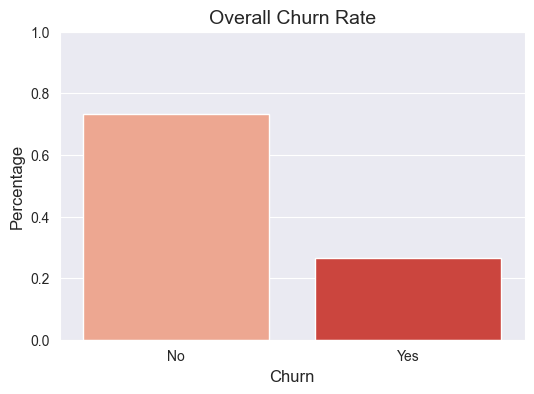

In [24]:
churn_rate = df['Churn'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Reds")
plt.title("Overall Churn Rate", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Churn", fontsize=12)
plt.xticks([0, 1], labels=["No", "Yes"])
plt.ylim(0, 1)
plt.show()

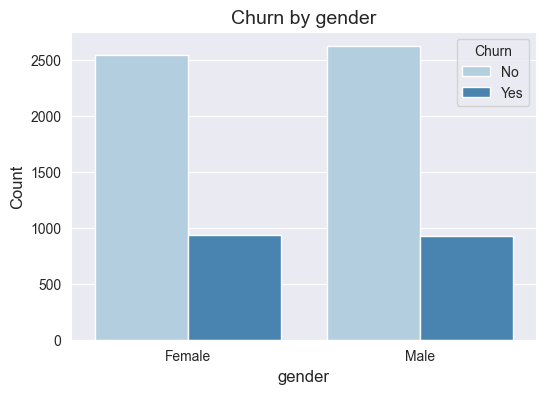

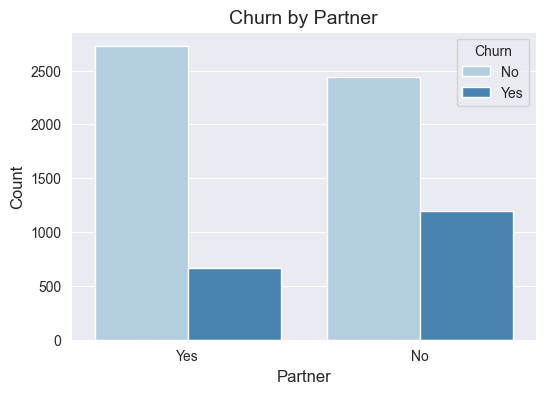

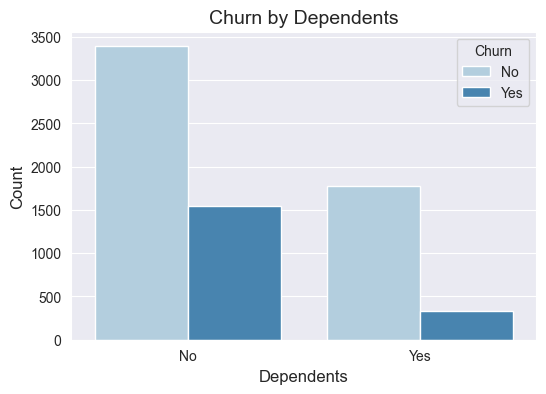

In [30]:
features = ['gender', 'Partner', 'Dependents']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Churn', data=df ,palette="Blues")
    plt.title(f"Churn by {feature}", fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.show()


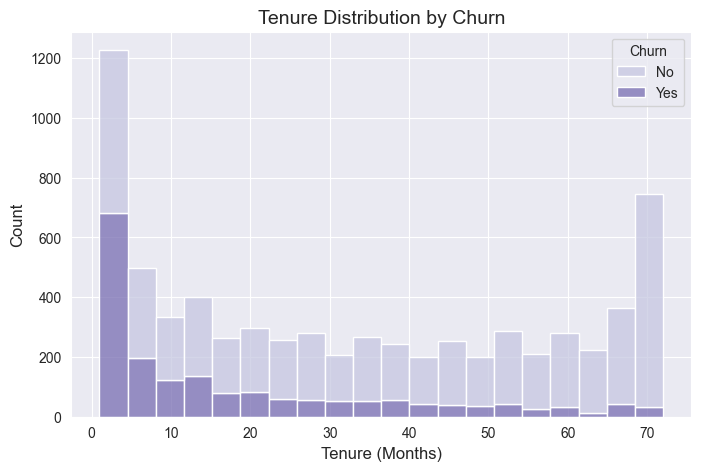

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", palette="Purples", bins=20)
plt.title("Tenure Distribution by Churn", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.show()

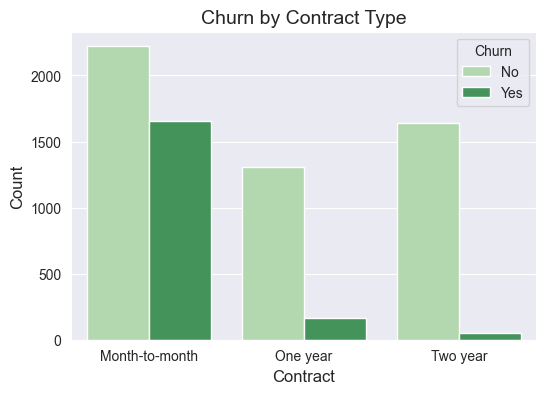

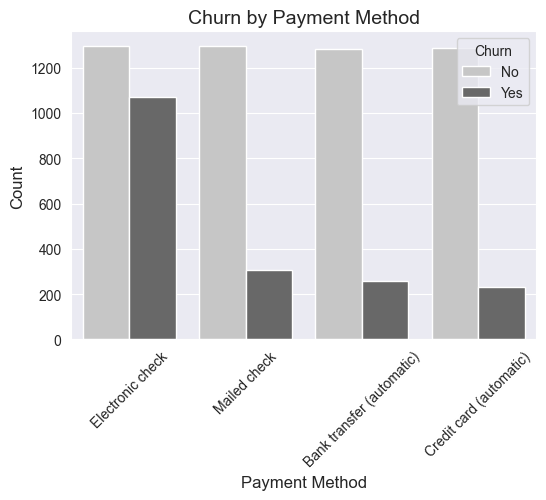

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette="Greens")
plt.title("Churn by Contract Type", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Contract", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette="Greys")
plt.title("Churn by Payment Method", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Payment Method", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
#task three

In [35]:
df['Tenure_Group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], 
                              labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

df['MonthlyCharges_Group'] = pd.cut(df['MonthlyCharges'], 
                                      bins=[0, 30, 60, 90, 120], 
                                      labels=['Low', 'Medium', 'High', 'Very High'])

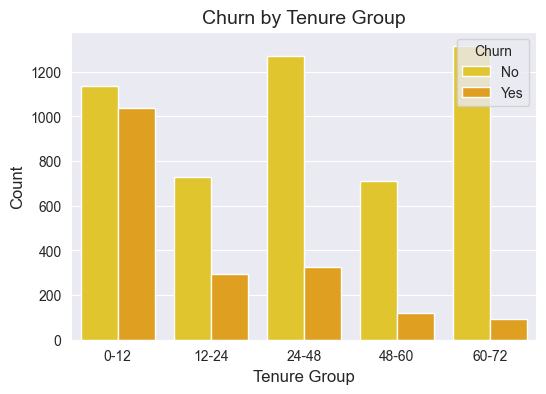

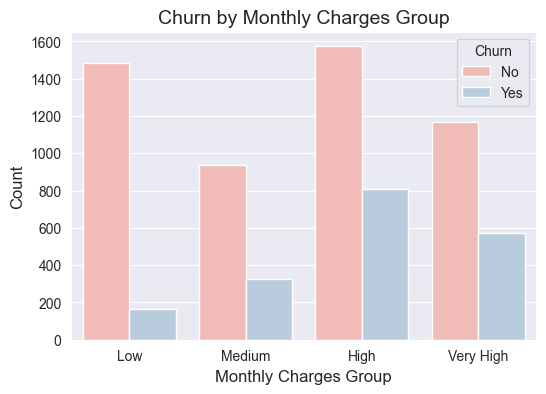

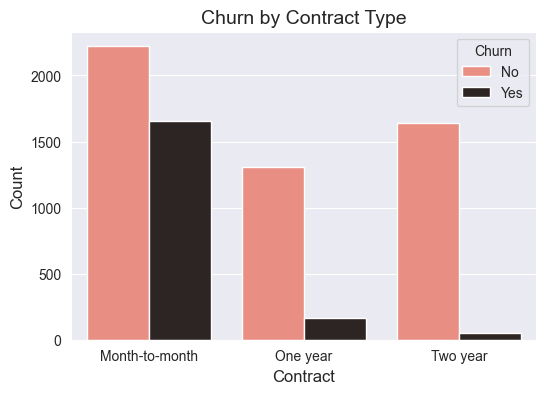

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Tenure_Group', hue='Churn', data=df, palette="Wistia")
plt.title("Churn by Tenure Group", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Tenure Group", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='MonthlyCharges_Group', hue='Churn', data=df, palette="Pastel1")
plt.title("Churn by Monthly Charges Group", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Monthly Charges Group", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette="dark:salmon_r")
plt.title("Churn by Contract Type", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Contract", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [42]:
high_value_customers = df[(df['MonthlyCharges'] > 90) & (df['Churn'] == 'Yes')]


print("High-value customers at risk of churn:")
print(high_value_customers[['customerID', 'MonthlyCharges', 'tenure', 'Churn']].head())

High-value customers at risk of churn:
    customerID  MonthlyCharges  tenure Churn
5   9305-CDSKC           99.65       8   Yes
8   7892-POOKP          104.80      28   Yes
13  0280-XJGEX          103.70      49   Yes
26  6467-CHFZW           99.35      47   Yes
38  5380-WJKOV          106.35      34   Yes


In [ ]:
#task four

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [44]:
log_model = LogisticRegression(max_iter=1000, random_state=42)


log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Metrics:
Accuracy: 0.81
Precision: 0.65
Recall: 0.57
F1-Score: 0.61

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1549
        True       0.65      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



In [45]:
tree_model = DecisionTreeClassifier(random_state=42)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Metrics:
Accuracy: 0.70
Precision: 0.45
Recall: 0.48
F1-Score: 0.47

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.79      0.80      1549
        True       0.45      0.48      0.47       561

    accuracy                           0.70      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.71      0.70      0.71      2110



In [46]:
param_grid = {'max_depth': [3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# أفضل نموذج
best_tree_model = grid_search.best_estimator_

y_pred_best_tree = best_tree_model.predict(X_test)

print("Optimized Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best_tree):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_tree):.2f}")

Optimized Decision Tree Metrics:
Accuracy: 0.75
Precision: 0.53
Recall: 0.44
F1-Score: 0.48
